In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pip install pywaffle

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 56.0 MB/s eta 0:00:00


In [7]:
data = pd.read_csv("https://github.com/ricardoramos12/30daychartchallenge/raw/refs/heads/main/Day01-Part-to-whole/data.csv")
filtered_data = data[['name', 'period']]
# Eliminar todo a la derecha después del segundo espacio en 'period'
filtered_data.loc[:, 'period'] = filtered_data['period'].apply(lambda x: ' '.join(x.split()[:2]))
filtered_data = filtered_data[filtered_data['period'] != 'USA']

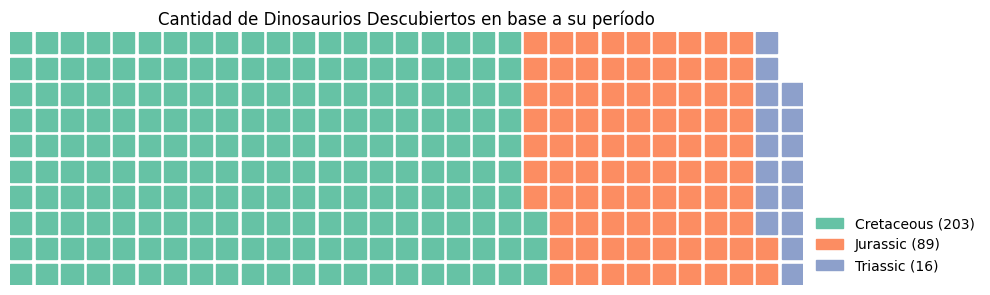

In [9]:
from pywaffle import Waffle

# Crear una nueva columna 'era' para agrupar en Triassic, Jurassic, y Cretaceous
filtered_data['era'] = filtered_data['period'].apply(lambda x: 'Triassic' if 'Triassic' in x else
                                                               'Jurassic' if 'Jurassic' in x else
                                                               'Cretaceous')
# Agrupar los datos por 'era' y contar las ocurrencias de 'name'
dino_counts = filtered_data.groupby('era')['name'].count().reset_index()
dino_counts = dino_counts.rename(columns={'name': 'count'})

data = dino_counts.set_index('era')['count'].to_dict()

# Genera el gráfico de waffle
fig = plt.figure(
    FigureClass=Waffle,
    rows=10,
    values=data,
    title={'label': 'Cantidad de Dinosaurios Descubiertos en base a su período', 'loc': 'center'},
    labels=[f"{key} ({value})" for key, value in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (1, 0), 'frameon': False},
    figsize=(10, 6)
)

plt.show()